Intercept: 7.0326
Slope: 0.0475
R² = 0.6119
MSE = 10.5127
RMSE = 3.2423


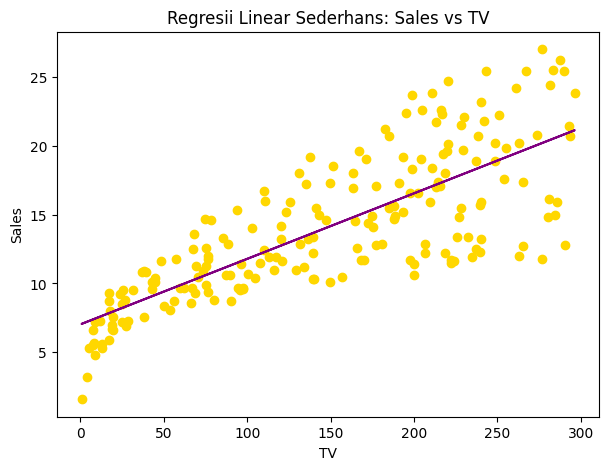

In [21]:
# SOAL 1 Regresi Liniar Sederhana
# Saya bersumpah bahwa saya mengerjakan ini dengan jujur

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('/Users/moodyblues/Downloads/Advertising.csv', index_col=0)

X = data[['TV']]
y = data['Sales']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R² = {r2:.4f}")
print(f"MSE = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")

plt.figure(figsize=(7,5))
plt.scatter(X, y, color='gold')
plt.plot(X, y_pred, color='purple')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regresii Linear Sederhans: Sales vs TV')
plt.show()

In [ ]:
# Analisis No 1:
# Model regresi linear sederhana antara Sales dan TV menunjukkan nilai R² sebesar 0.6119, yang berarti sekitar 61% variasi penjualan dapat dijelaskan oleh biaya iklan televisi. 
# Nilai RMSE sebesar 3.24 menunjukkan bahwa rata-rata kesalahan prediksi penjualan adalah sekitar 3 unit, sehingga model memiliki tingkat akurasi yang sedang. 
# Koefisien slope positif (0.0475) menandakan bahwa setiap kenaikan 1 satuan biaya iklan TV berpotensi meningkatkan penjualan sebesar 0.0475 unit, sementara intercept 7.03 menunjukkan nilai penjualan dasar saat tidak ada biaya iklan TV. 
# Secara keseluruhan, model ini sudah cukup baik untuk menggambarkan hubungan linear dasar antara TV dan penjualan, namun masih ada faktor lain seperti Radio dan Newspaper yang perlu dipertimbangkan agar prediksi menjadi lebih akurat.

In [10]:
# Soal 2
# Saya bersumpah bahwa saya mengerjakan ini dengan jujur

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('/Users/moodyblues/Downloads/Advertising.csv', index_col=0)

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef = model.coef_

print(f"Intercept: {intercept:.4f}")
print(f"Koefisien: {coef}")

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R² = {r2:.4f}")
print(f"MSE = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")

Intercept: 2.9389
Koefisien: [ 0.04576465  0.18853002 -0.00103749]
R² = 0.8972
MSE = 2.7841
RMSE = 1.6686


In [ ]:
# Analisis No 2:
# Model regresi linear berganda dengan variabel independen TV, Radio, dan Newspaper menghasilkan nilai R² sebesar 0.8972, yang berarti sekitar 89,7% variasi penjualan dapat dijelaskan oleh ketiga variabel iklan tersebut. 
# Nilai RMSE sebesar 1.67 menunjukkan kesalahan prediksi yang jauh lebih kecil dibandingkan model sederhana, menandakan peningkatan akurasi yang signifikan. 
# Koefisien regresi menunjukkan bahwa iklan TV (0.0458) dan Radio (0.1885) memiliki pengaruh positif yang kuat terhadap penjualan, sedangkan Newspaper (-0.0010) hampir tidak berpengaruh. 
# Secara keseluruhan, model berganda ini memiliki kinerja yang jauh lebih baik dibandingkan model sederhana karena mampu menangkap kontribusi gabungan dari berbagai media iklan terhadap penjualan.

   Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001
3         -3.949661                37.539845
4         -3.578554                32.284531
    Temperature (°C)  Ice Cream Sales (units)
44          3.610778                28.912188
45          3.704057                17.843957
46          4.130868                34.530743
47          4.133534                27.698383
48          4.899032                41.514822
Jumlah null values:
 Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64
Dimensi data: (49, 2)
Jumlah duplikat: 0


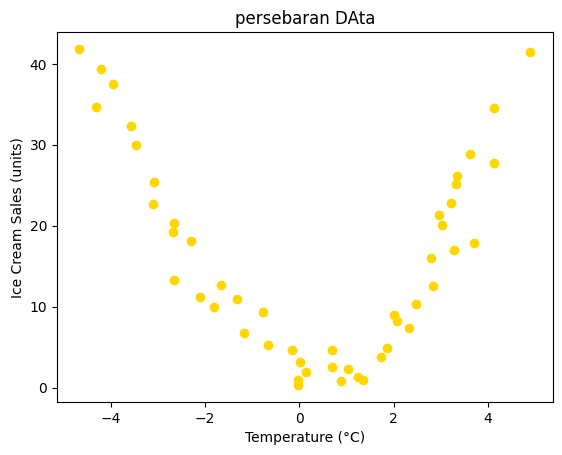

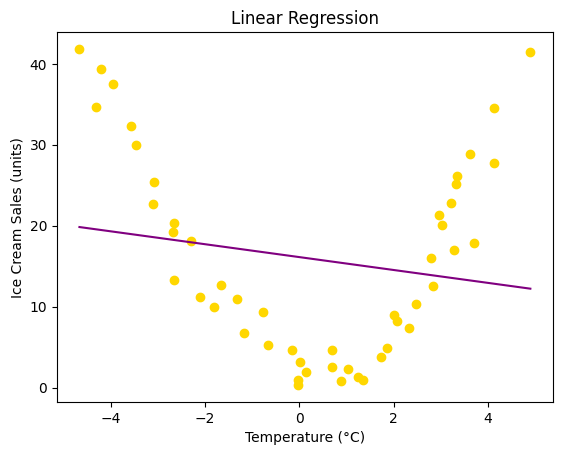

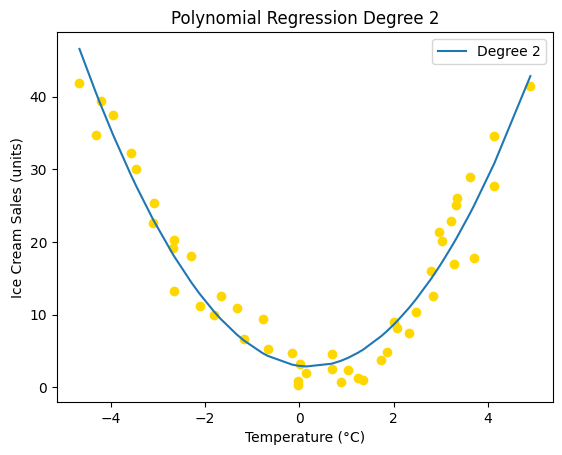

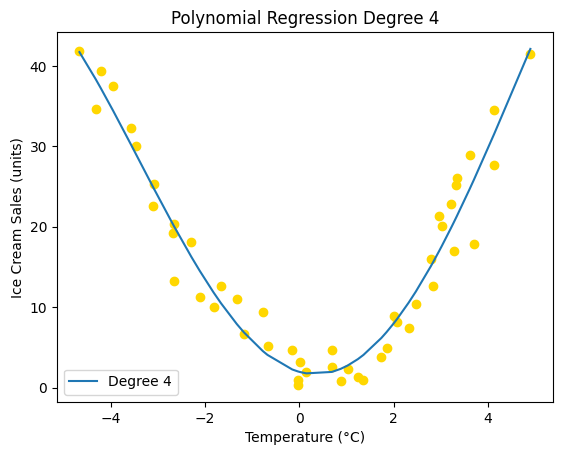

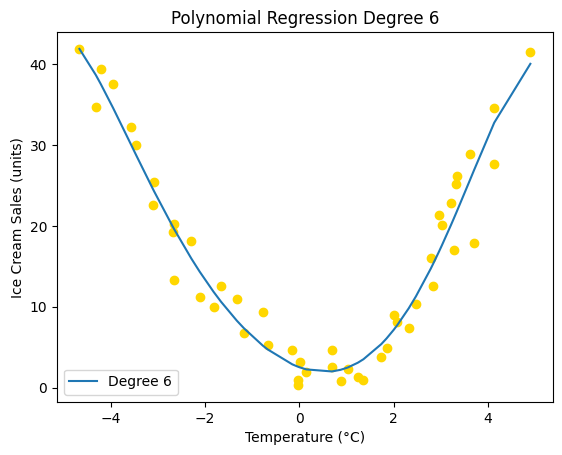

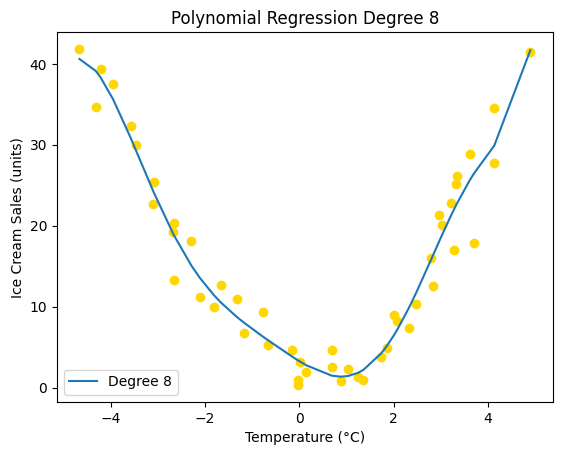

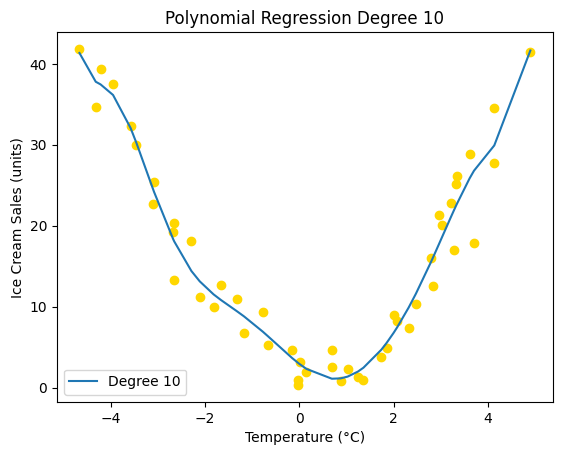

In [23]:
# Soal 3
# Saya bersumpah bahwa saya mengerjakan ini dengan jujur

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

data = pd.read_csv('/Users/moodyblues/Downloads/Ice_cream selling data.csv')

print(data.head())
print(data.tail())
print("Jumlah null values:\n", data.isnull().sum())
print("Dimensi data:", data.shape)
print("Jumlah duplikat:", data.duplicated().sum())

plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'], color='gold')
plt.title('persebaran DAta')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

X = data[['Temperature (°C)']].values
y = data['Ice Cream Sales (units)'].values

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

plt.scatter(X, y, color='gold')
plt.plot(X, y_pred_lin, color='purple')
plt.title('Linear Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

degrees = [2, 4, 6, 8, 10]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)
    
    plt.scatter(X, y, color='gold')
    plt.plot(X, y_pred_poly, label=f'Degree {d}')
    plt.title(f'Polynomial Regression Degree {d}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.legend()
    plt.show()

In [ ]:
# Analisis No 3:
# Berdasarkan hasil visualisasi polynomial regression dengan derajat 2, 4, 6, 8, dan 10, terlihat bahwa hubungan antara suhu (Temperature) dan penjualan es krim (Ice Cream Sales) bersifat non-linear — penjualan meningkat tajam seiring kenaikan suhu. 
# Model linear tidak mampu mengikuti pola data dengan baik karena garis regresinya terlalu kaku. 
# Dari beberapa derajat polynomial yang diuji, degree 4 memberikan hasil paling sesuai: kurva mengikuti tren data secara halus tanpa overfitting yang berlebihan seperti pada degree 8 atau 10. Oleh karena itu, model Polynomial Regression degree 4 dianggap paling tepat untuk menggambarkan hubungan antara suhu dan penjualan es krim pada dataset ini.

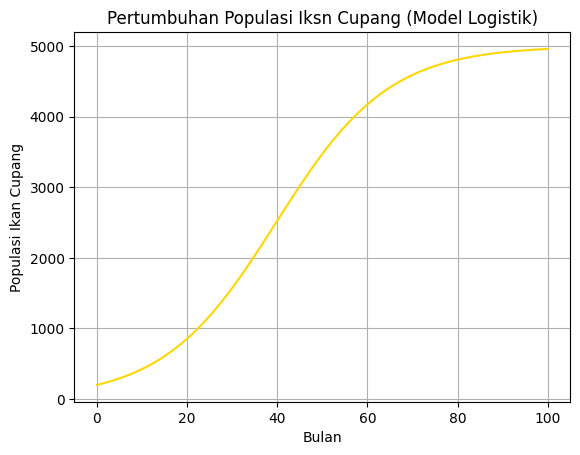

In [18]:
# soal 4
# Saya bersumpah bahwa saya mengerjakan ini dengan jujur

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def logistic_growth(P, t, r, K):
    return r * P * (1 - P / K)

P0 = 200
r = 0.08
K = 5000
t = np.linspace(0, 100, 100)

P = odeint(logistic_growth, P0, t, args=(r, K))

plt.plot(t, P, color='gold')
plt.title('Pertumbuhan Populasi Iksn Cupang (Model Logistik)')
plt.xlabel('Bulan')
plt.ylabel('Populasi Ikan Cupang')
plt.grid(True)
plt.show()

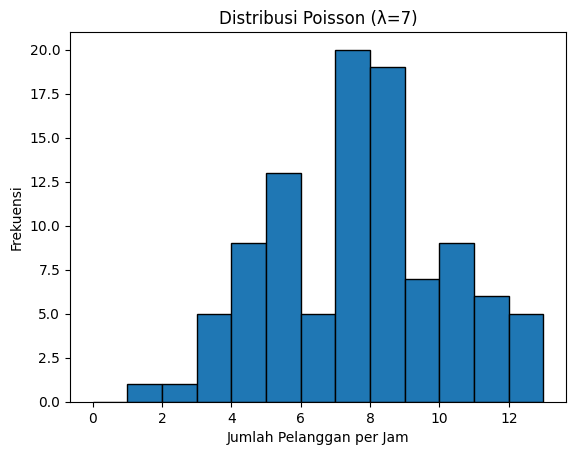

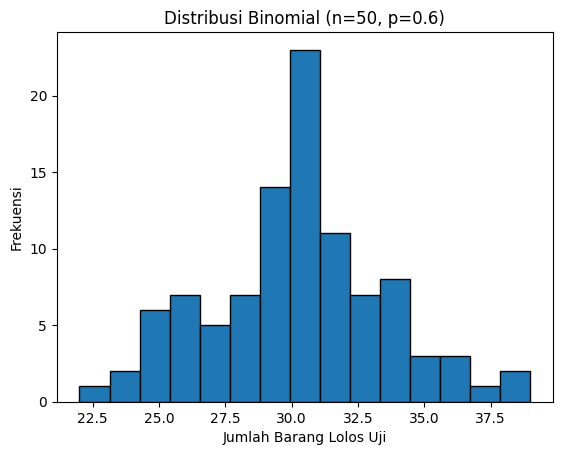

Percobaan 1: [0 3 5 0 0]
Percobaan 2: [4 2 3 6 1]


In [13]:
# Soal 6
# Saya bersumpah bahwa saya mengerjakan ini dengan jujur

import numpy as np
import matplotlib.pyplot as plt

# a. Distribusi Poisson
lam = 7
data_poisson = np.random.poisson(lam, 100)
plt.hist(data_poisson, bins=range(0, max(data_poisson)+1), edgecolor='black')
plt.title('Distribusi Poisson (λ=7)')
plt.xlabel('Jumlah Pelanggan per Jam')
plt.ylabel('Frekuensi')
plt.show()

# b. Fistribusi Binomial
n, p = 50, 0.6
data_binom = np.random.binomial(n, p, 100)
plt.hist(data_binom, bins=15, edgecolor='black')
plt.title('Distribusi Binomial (n=50, p=0.6)')
plt.xlabel('Jumlah Barang Lolos Uji')
plt.ylabel('Frekuensi')
plt.show()

# c. Distribusi Multinomial
n1, pvals1 = 8, [0.25, 0.25, 0.25, 0.25, 0]
sim1 = np.random.multinomial(n1, pvals1)
print("Percobaan 1:", sim1)

n2, pvals2 = 16, [0.2, 0.2, 0.2, 0.2, 0.2]
sim2 = np.random.multinomial(n2, pvals2)
print("Percobaan 2:", sim2)